In [2]:
# Bengaluru House Price Prediction Model 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [3]:
df = pd.read_csv(r"F:\Datascience\dataset\Bengaluru_House_Data.csv")
print("Data Loaded Successfully")
print(df.head())

Data Loaded Successfully
              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  


In [4]:
df.dropna(inplace=True)
df = df.drop_duplicates()

In [5]:
# Remove unwanted spaces in column names
df.columns = df.columns.str.strip()


In [6]:
#feature engineering
# Handle 'size' column (e.g., "2 BHK" into 2)
if 'size' in df.columns:
    df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) else np.nan)

# Convert total_sqft to numeric
def convert_sqft(x):
    try:
        tokens = x.split('-')
        if len(tokens) == 2:
            return (float(tokens[0]) + float(tokens[1])) / 2
        return float(x)
    except:
        return None

if 'total_sqft' in df.columns:
    df['total_sqft'] = df['total_sqft'].apply(convert_sqft)

In [7]:
# Drop rows with missing numeric values
df.dropna(subset=['total_sqft', 'bhk'], inplace=True)


In [8]:
# Encode categorical features
categorical_cols = df.select_dtypes(include='object').columns.tolist()
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [9]:
# Split Data into Features and Target
X = df.drop('price', axis=1)
y = df['price']

In [10]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Build the Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
# Predictions and Evaluation
y_pred = model.predict(X_test)

print("\n Model Performance:")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))



 Model Performance:
R² Score: 0.7365332152196591
MAE: 20.234330139895224
RMSE: 45.09670808307853


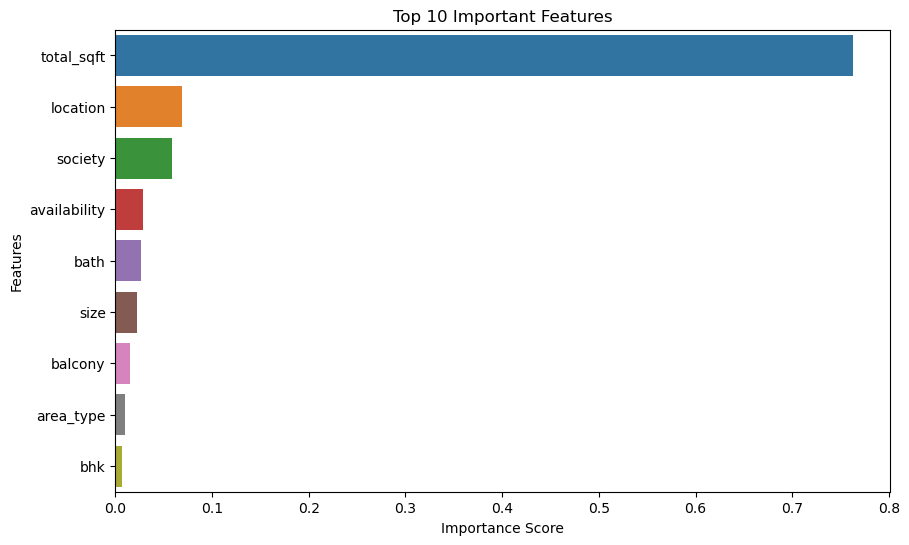

In [13]:
#feature importance visualization
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
